<a href="https://colab.research.google.com/github/somyamangla/Machine-Learning-Algorithm/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation (k-Mean clustering)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Conclusions:


*   No null value in the dataset.
*   gender is of dtype object, which needs to be taken care of



In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### Conclusion:


*   Average age of customer is 38.
*   customer that visits mall is having age between 18-70.
*   having the avg annual income as 60k$ 









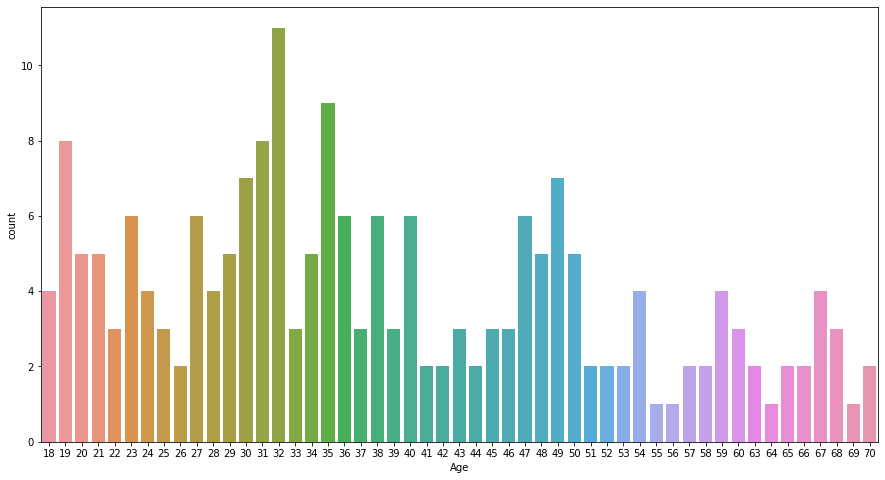

In [8]:
plt.figure(figsize = (15,8))
sns.countplot(data = df, x = 'Age')

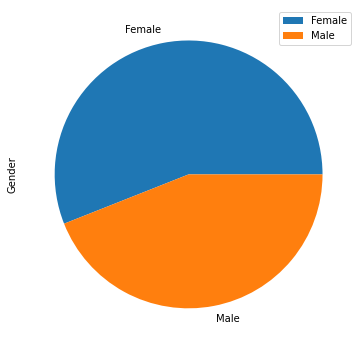

In [9]:
plt.figure(figsize = (6,8))
df.Gender.value_counts().plot(kind = 'pie')
plt.legend()


#### Conclusions:


*   number of females > number of males.
*   people between age group of 30-36 tend to visit mall more often.




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of annual income')

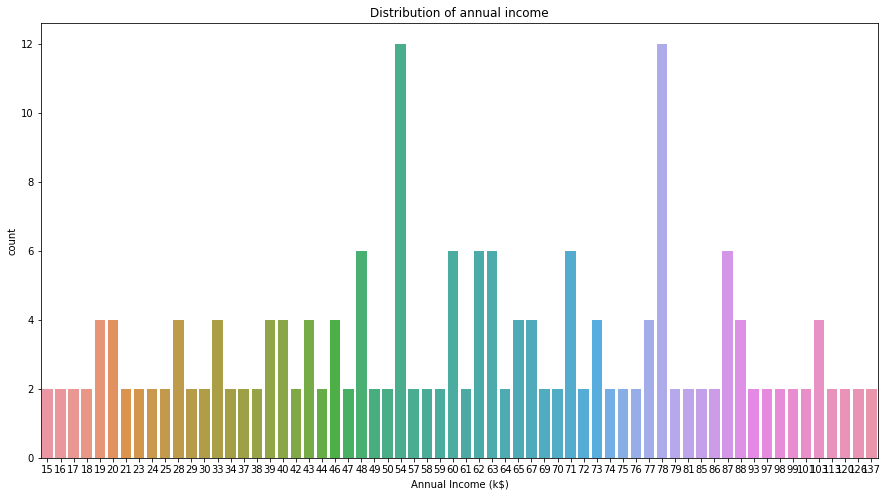

In [10]:
# Distribution of income
plt.figure(figsize = (15,8))
sns.countplot(df['Annual Income (k$)'], data = df)
plt.title('Distribution of annual income')

### Conclusion:


*   the customers that are having the salary of 54k$  and  78k$ are visiting mall more number of times.




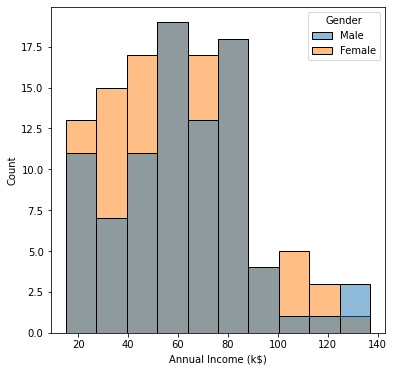

In [11]:
# show the annual income distribution wrt the gender 

plt.figure(figsize = (6,6))
sns.histplot(df, x = 'Annual Income (k$)', hue = 'Gender')

# ML


In [12]:
# label encoding 

from sklearn.preprocessing import LabelEncoder

In [13]:
enc = LabelEncoder()


In [14]:
df.Gender = enc.fit_transform(df.Gender)

In [15]:
df.drop('CustomerID', axis = 1, inplace = True)

In [16]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [17]:
lst = []
for i in range(1,11):
  kmodel = KMeans(n_clusters = i, n_init = 15, max_iter = 500) 
  kmodel.fit(df)
  lst.append(kmodel.inertia_)

In [18]:
lst

[308862.06000000006,
 212889.44245524297,
 143391.59236035682,
 104414.67534220166,
 75399.61541401483,
 58348.64136331505,
 51165.18423710792,
 44357.326649026654,
 40938.426715394104,
 38071.139086201154]

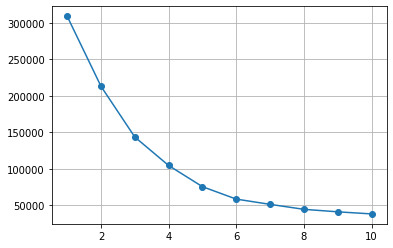

In [19]:
plt.plot(range(1,11), lst, marker = 'o')
plt.grid()

In [ ]:
# k = 6

In [20]:
kmodel = KMeans(n_clusters = 6)

In [21]:
kmodel.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
prediction = kmodel.predict(df)

In [23]:
kmodel.cluster_centers_

array([[ 0.44444444, 56.15555556, 53.37777778, 49.08888889],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636],
       [ 0.38095238, 44.14285714, 25.14285714, 19.52380952],
       [ 0.34210526, 27.        , 56.65789474, 49.13157895]])

In [24]:
len(kmodel.cluster_centers_)

6

In [25]:
df['clusters'] = prediction

In [26]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4


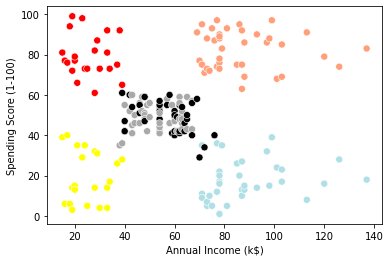

In [27]:
color = np.array(['darkgray', 'lightsalmon', 'powderblue', 'red', 'yellow', 'black'])
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], c = color[kmodel.labels_], s = 50)


### Conclusions:


*   red color people have very low income but their expenditure is very high.
*   blue color people have high annual income and high expenditure.


*   yellow color people have very low income and are spending low.
*   pink color people have high annual income and are spending less.


*   black and gray color people are spending their whole income.








In [28]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [29]:
var = linkage(df, method = 'ward')

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',

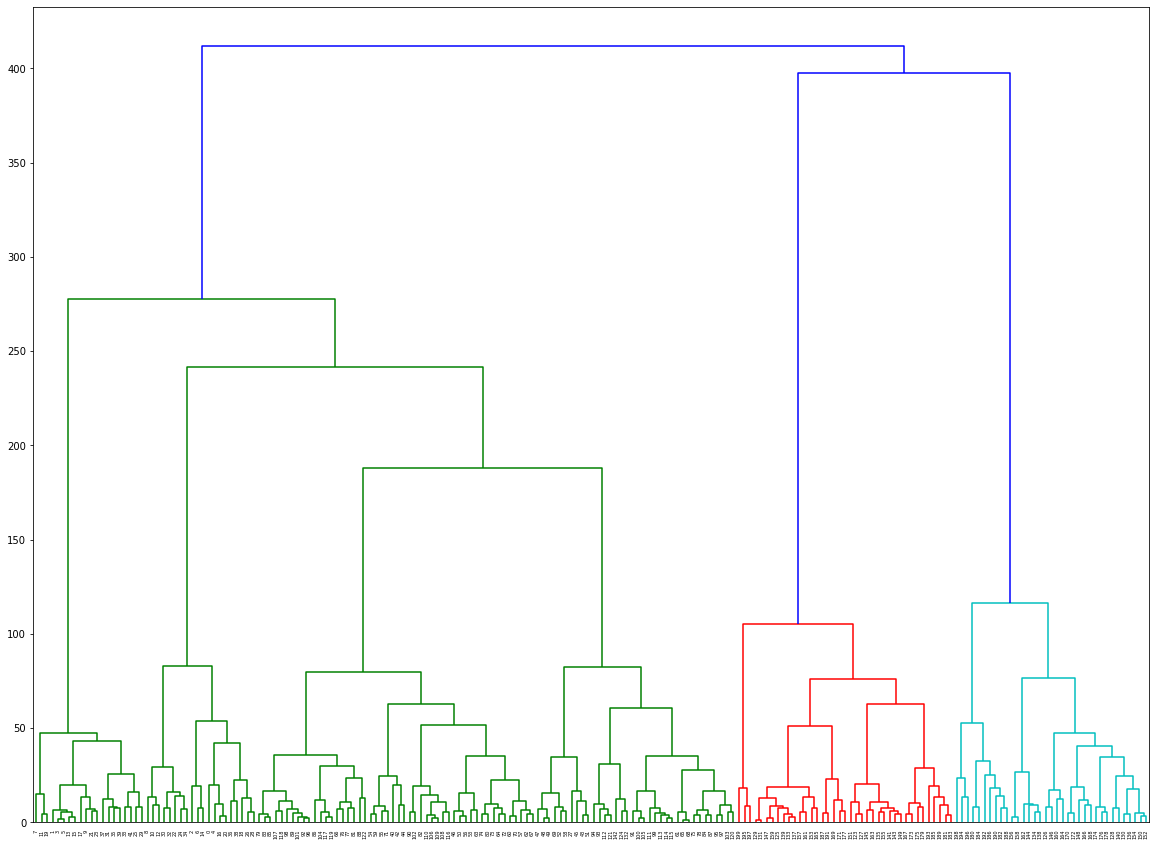

In [30]:
plt.figure(figsize = (20,15))
dendrogram(var)